<a href="https://colab.research.google.com/github/nisawan/DiscoverDinosaurs/blob/main/DiscoverDinosaurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import

In [ ]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

In [ ]:
from fastbook import *

In [ ]:
!git clone https://github.com/nisawan/DiscoverDinosaurs.git

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(valid_name = 'valid'),
    get_y = parent_label,
    item_tfms = Resize(512, method=ResizeMethod.Squish),
    batch_tfms = aug_transforms(size = 512, flip_vert = True)
    )
dls = dblock.dataloaders('DiscoverDinosaurs/images/', bs = 64)

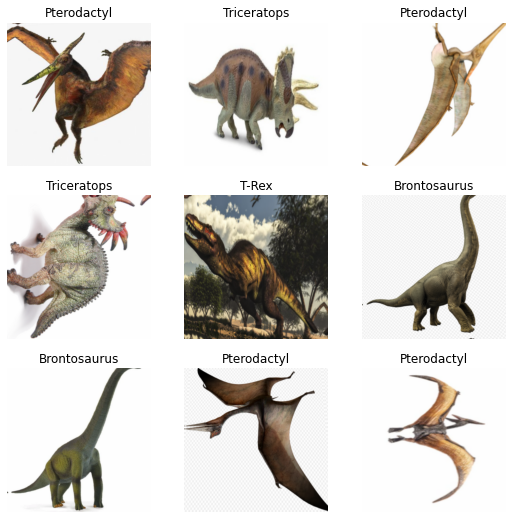

In [ ]:
dls.train.show_batch(max_n = 9, nrows = 3)

# Training

In [ ]:
learn = vision_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.653279,3.129014,0.350000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,1.798055,1.988945,0.550000,00:08
1,1.406274,0.961290,0.750000,00:07
2,1.116274,0.335184,0.800000,00:08
3,0.911467,0.073998,1.000000,00:07
4,0.749941,0.023351,1.000000,00:08
5,0.644704,0.015863,1.000000,00:08


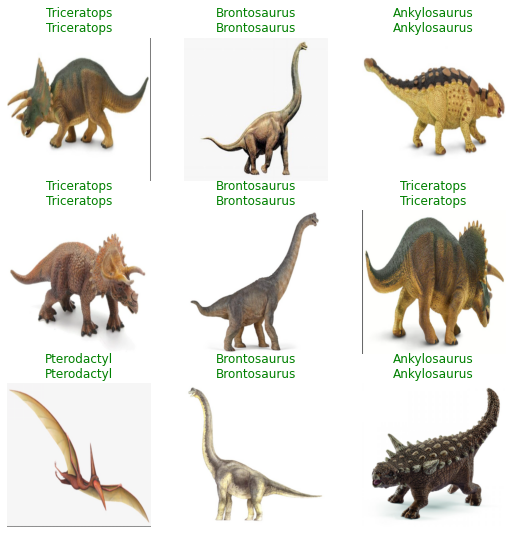

In [ ]:
learn.show_results()

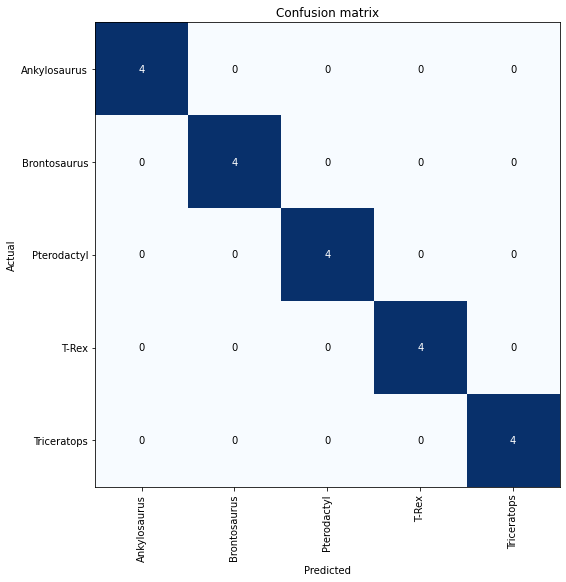

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (8,8))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

Ankylosaurus       1.00      1.00      1.00         4
Brontosaurus       1.00      1.00      1.00         4
 Pterodactyl       1.00      1.00      1.00         4
       T-Rex       1.00      1.00      1.00         4
 Triceratops       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
learn.save('model')

Path('models/model.pth')

# Testing

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(valid_name = 'test'),
    get_y=parent_label,
    item_tfms = Resize(512, method = ResizeMethod.Squish),
    batch_tfms = aug_transforms(size = 512)
    )
dls = dblock.dataloaders('DiscoverDinosaurs/images/', bs = 64)

learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.load('model');

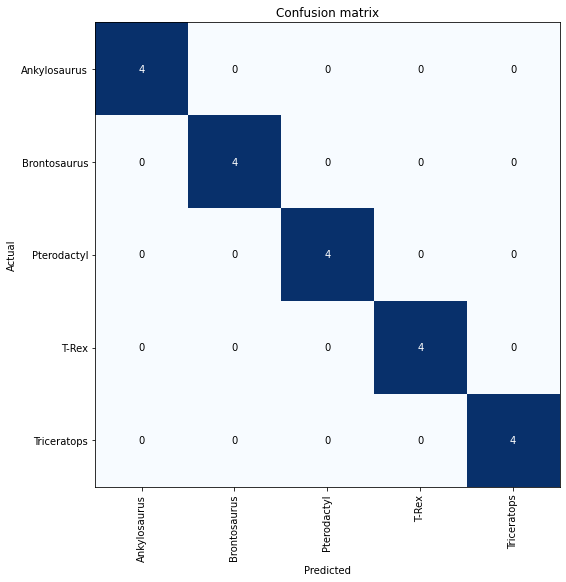

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (8,8))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

Ankylosaurus       1.00      1.00      1.00         4
Brontosaurus       1.00      1.00      1.00         4
 Pterodactyl       1.00      1.00      1.00         4
       T-Rex       1.00      1.00      1.00         4
 Triceratops       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

